# Challenge Caja los Andes: Para puesto de Data Scientist

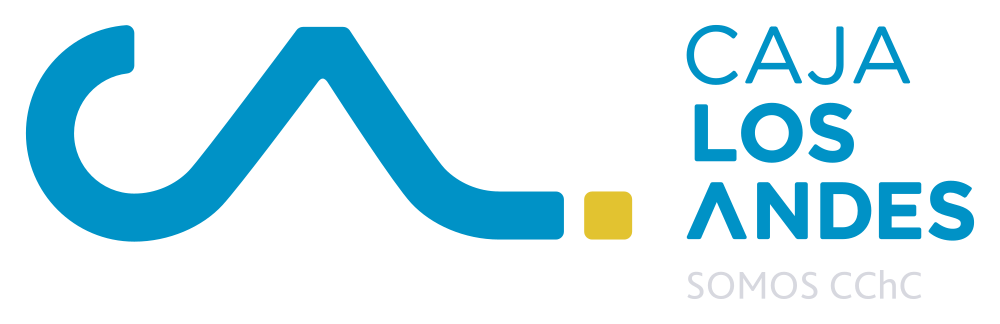

In [1]:
from IPython.display import SVG, display
def show_svg():
    display(SVG(url='https://upload.wikimedia.org/wikipedia/commons/3/34/Logotipo_Caja_Los_Andes.svg'))
show_svg()

# Introduction 



# Code

In [576]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statistics import mean
from matplotlib import pyplot
import matplotlib.patches as mpatches
import time
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, RepeatedStratifiedKFold, GridSearchCV, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler


colors = ["#01c1df", "#dbdf01"]

df = pd.read_csv("../data/raw/dataset_Caso_1.csv")
df.info(verbose= "True")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2000 non-null   float64
 1   x2      2000 non-null   float64
 2   x3      2000 non-null   object 
 3   x4      2000 non-null   object 
 4   x5      2000 non-null   int64  
 5   x6      2000 non-null   int64  
 6   x7      2000 non-null   int64  
 7   x8      2000 non-null   float64
 8   target  2000 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 140.8+ KB


In [77]:
df.head(5)

,x1,x2,x3,x4,x5,x6,x7,x8,target
0,50.1341,-326.0000,SAT,MZBER,0,0,6,-6.5,0
1,50.1341,-326.0000,SAT,MZBER,0,0,6,-4.5,0
2,124.3276,-275.1935,LCV,MZBER,0,0,3,-2.5,0
3,50.1341,-326.0000,SAT,MZBER,0,0,3,-4.5,0
4,85.3905,-298.8632,XJB,MZBER,0,0,5,-4.5,0


In [4]:
df.describe()

,x1,x2,x5,x6,x7,x8,target
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,101.074885,-298.282145,0.01250,0.027000,3.440500,-5.343500,0.011000
std,22.670474,16.596490,0.11113,0.162124,0.972591,1.570108,0.104329
min,50.134100,-326.000000,0.00000,0.000000,3.000000,-7.500000,0.000000
25%,89.501675,-308.930400,0.00000,0.000000,3.000000,-6.500000,0.000000
50%,105.236100,-297.825600,0.00000,0.000000,3.000000,-5.500000,0.000000
75%,116.023175,-288.169025,0.00000,0.000000,3.000000,-4.500000,0.000000
max,150.134100,-226.000000,1.00000,1.000000,8.000000,-1.500000,1.000000


In [5]:
# WE seek for null elements in the dataset
df.isnull().sum().max()

0

In [6]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['target'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['target'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 98.9 % of the dataset
Frauds 1.1 % of the dataset


*Resumen de los datos:*
1. Cambiar x3,x4,x8 por cantidades enteras.
2. Clasificación binaria.
3. Estandarizar rango en cada columna to obtain better performance.
4. Conjunto pequeño de datos por lo que admite tecnicas de ML más especificas sin precuparse por el gasto computacional.

## Preprocesamiento de los datos

In [577]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Assuming df is your DataFrame and 'target' is the target column

# Identify the categorical columns
categorical_columns = ['x3', 'x4', 'x5', 'x6', 'x7', 'x8']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

# Create a DataFrame with the one-hot encoded columns
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

# Identify the numerical columns
numerical_columns = ['x1', 'x2']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply standardization to the numerical columns
standardized = scaler.fit_transform(df_encoded[numerical_columns])

# Create a DataFrame with the standardized columns
standardized_df = pd.DataFrame(standardized, columns=numerical_columns)

# Concatenate the standardized columns with the rest of the DataFrame
df_encoded[numerical_columns] = standardized_df

# Move the target column to the last position
columns = [col for col in df_encoded.columns if col != 'target'] + ['target']
df = df_encoded.reindex(columns=columns)

df


,x1,x2,x3_LCV,x3_QKP,x3_SAT,x3_XJB,x4_MZBER,x4_PQKE,x4_YEQA,x4_ZUQF,...,x7_6,x7_8,x8_-7.5,x8_-6.5,x8_-5.5,x8_-4.5,x8_-3.5,x8_-2.5,x8_-1.5,target
0,-2.247572,-1.670521,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1,-2.247572,-1.670521,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,1.025939,1.391524,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,-2.247572,-1.670521,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4,-0.692015,-0.035019,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.802121,0.880734,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1996,0.227936,0.215753,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1997,1.146373,0.183901,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1998,0.590802,0.479194,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [578]:
df.info(verbose= "True")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   x1        2000 non-null   float64
 1   x2        2000 non-null   float64
 2   x3_LCV    2000 non-null   float64
 3   x3_QKP    2000 non-null   float64
 4   x3_SAT    2000 non-null   float64
 5   x3_XJB    2000 non-null   float64
 6   x4_MZBER  2000 non-null   float64
 7   x4_PQKE   2000 non-null   float64
 8   x4_YEQA   2000 non-null   float64
 9   x4_ZUQF   2000 non-null   float64
 10  x5_0      2000 non-null   float64
 11  x5_1      2000 non-null   float64
 12  x6_0      2000 non-null   float64
 13  x6_1      2000 non-null   float64
 14  x7_3      2000 non-null   float64
 15  x7_4      2000 non-null   float64
 16  x7_5      2000 non-null   float64
 17  x7_6      2000 non-null   float64
 18  x7_8      2000 non-null   float64
 19  x8_-7.5   2000 non-null   float64
 20  x8_-6.5   2000 non-null   floa

## EDA

Now we create suitable visual information about df, then we get a inuition about the bevaviour of our dataset

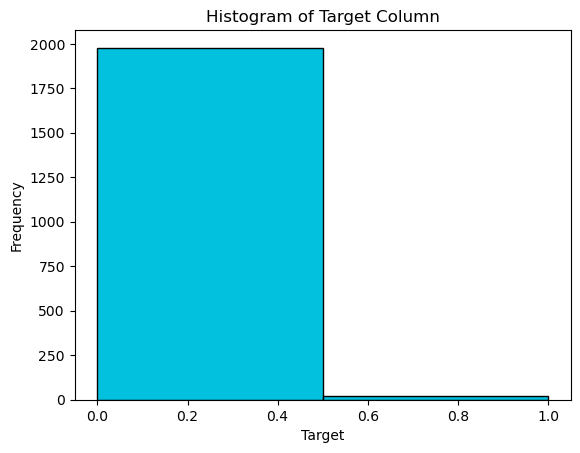

In [579]:

# Create histogram for the "target" column
plt.hist(df['target'], bins=2, edgecolor='black', color=colors[0])
plt.title('Histogram of Target Column')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

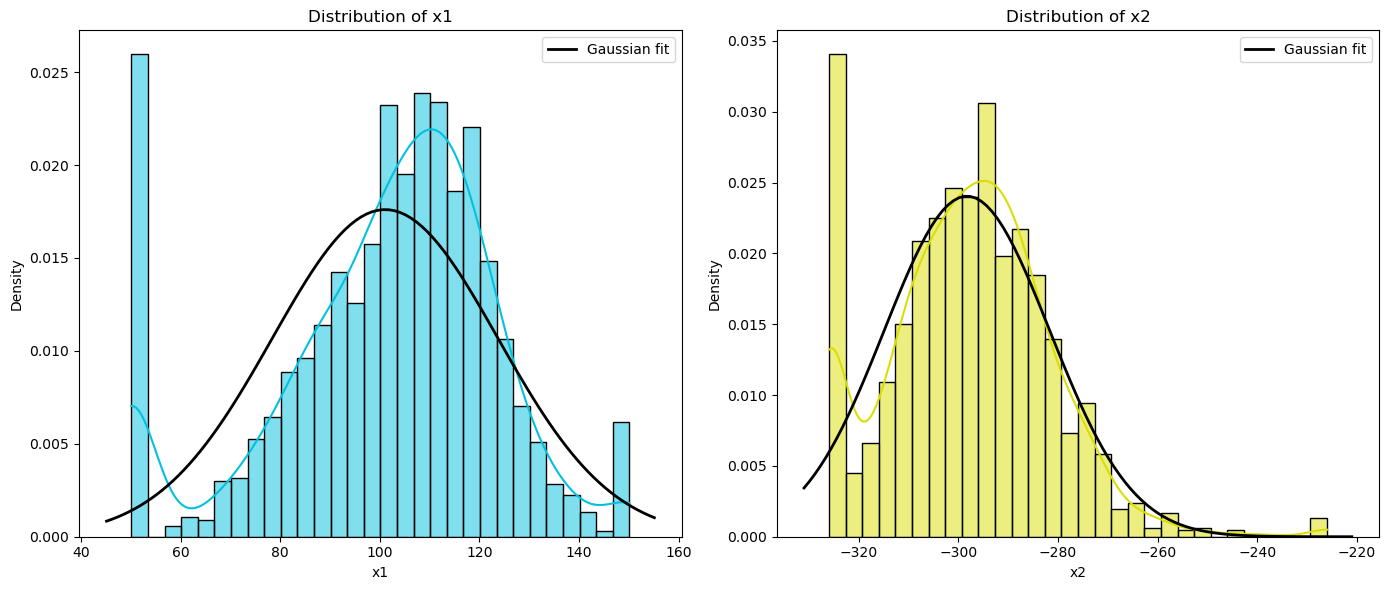

In [537]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

# Assuming df is already defined as per the given structure
# Create distribution plots for x1 and x2
plt.figure(figsize=(14, 6))

# Distribution plot for x1
plt.subplot(1, 2, 1)
sns.histplot(df['x1'], kde=True, bins=30, color=colors[0], stat='density')
plt.title('Distribution of x1')

# Fit a normal distribution to x1
mu_x1, std_x1 = norm.fit(df['x1'])
xmin_x1, xmax_x1 = plt.xlim()
x_x1 = np.linspace(xmin_x1, xmax_x1, 100)
p_x1 = norm.pdf(x_x1, mu_x1, std_x1)
plt.plot(x_x1, p_x1, 'k', linewidth=2, label='Gaussian fit')
plt.legend()

# Distribution plot for x2
plt.subplot(1, 2, 2)
sns.histplot(df['x2'], kde=True, bins=30, color=colors[1], stat='density')
plt.title('Distribution of x2')

# Fit a normal distribution to x2
mu_x2, std_x2 = norm.fit(df['x2'])
xmin_x2, xmax_x2 = plt.xlim()
x_x2 = np.linspace(xmin_x2, xmax_x2, 100)
p_x2 = norm.pdf(x_x2, mu_x2, std_x2)
plt.plot(x_x2, p_x2, 'k', linewidth=2, label='Gaussian fit')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

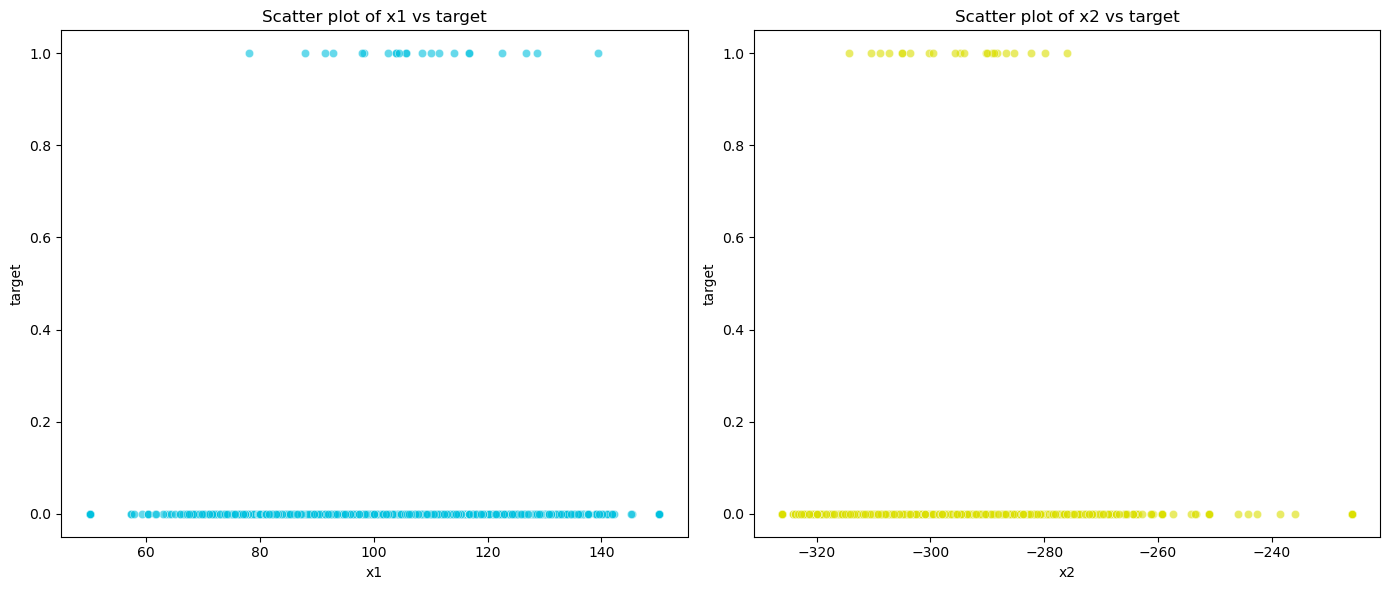

In [538]:
# Create scatter plots for x1 vs target and x2 vs target
plt.figure(figsize=(14, 6))

# Scatter plot for x1 vs target
plt.subplot(1, 2, 1)
sns.scatterplot(x='x1', y='target', data=df, alpha=0.6, color=colors[0])
plt.title('Scatter plot of x1 vs target')
plt.xlabel('x1')
plt.ylabel('target')

# Scatter plot for x2 vs target
plt.subplot(1, 2, 2)
sns.scatterplot(x='x2', y='target', data=df, alpha=0.6, color=colors[1])
plt.title('Scatter plot of x2 vs target')
plt.xlabel('x2')
plt.ylabel('target')

# Show the plots
plt.tight_layout()
plt.show()

In [580]:
import pandas as pd

# Filter the DataFrame for the specified conditions for x1
filtered_df_x1 = df[(df['x1'] > 2) | (df['x1'] < -2)]

# Count the elements for each target value for x1
count_distribution_x1 = filtered_df_x1.groupby('target').size().reset_index(name='count_x1')

# Display the count distribution for x1
print("Distribution for x1:")
print(count_distribution_x1)

# Filter the DataFrame for the specified conditions for x2
filtered_df_x2 = df[df['x2'] < -1.3]

# Count the elements for each target value for x2
count_distribution_x2 = filtered_df_x2.groupby('target').size().reset_index(name='count_x2')

# Display the count distribution for x2
print("Distribution for x2:")
print(count_distribution_x2)

Distribution for x1:
   target  count_x1
0       0       214
Distribution for x2:
   target  count_x2
0       0       249


we can delete outliers

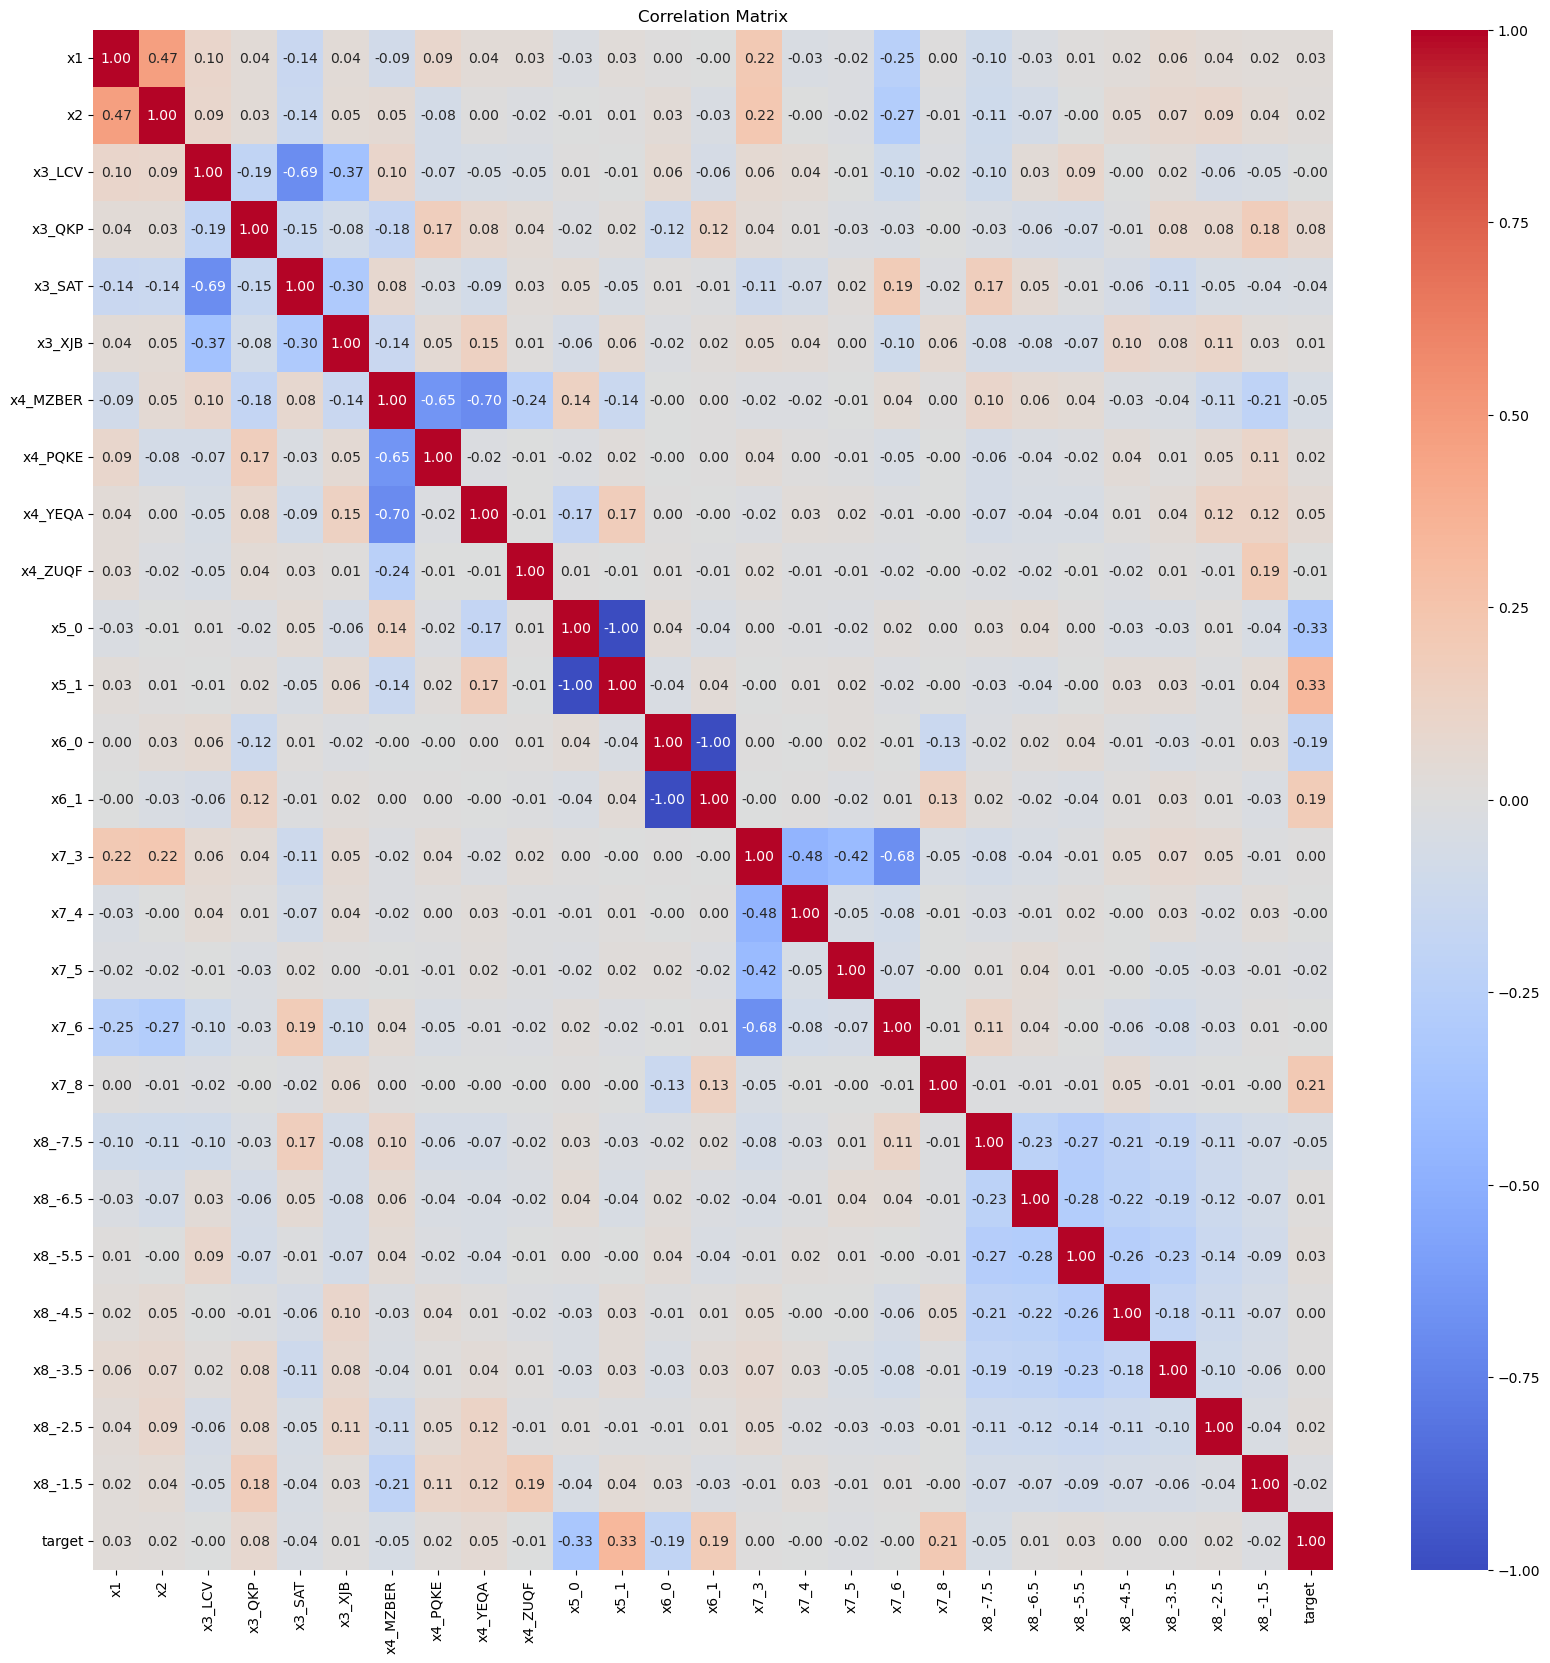

In [436]:
# Compute correlation matrix with 3 decimal precision and plot
corr_matrix = df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## TRain teste split and preprocessing of train sample

In [658]:
X = df.drop(['target','x5_0'], axis=1)
y = df['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 1)


In [659]:
# Combine X_train and y_train for easier filtering
X_train_ytrain = X_train.copy()
X_train_ytrain['target'] = y_train

# Identify the columns to check for outliers
columns_to_check = ['x1', 'x2']

# Remove outliers for each specified column
for col in columns_to_check:
    Q1 = X_train_ytrain[col].quantile(0.25)
    Q3 = X_train_ytrain[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.2* IQR
    upper_bound = Q3 + 1.2* IQR
    X_train_ytrain = X_train_ytrain[(X_train_ytrain[col] >= lower_bound) & (X_train_ytrain[col] <= upper_bound)]

# Separate X_train and y_train after filtering
X_train = X_train_ytrain.drop('target', axis=1)
y_train = X_train_ytrain['target']

# Optionally, print the shapes of the filtered training sets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (1228, 25)
y_train shape: (1228,)


In [660]:
# Calculate the counts of 0's and 1's
percentage_dict = {value: count / len(y_test) * 100 for value, count in zip(*np.unique(y_test, return_counts=True))}

# Print the results
print("Percentage of 0's and 1's in y_test:")
for value, percentage in percentage_dict.items():
    print(f"{value}: {percentage:.2f}%")

Percentage of 0's and 1's in y_test:
0: 98.83%
1: 1.17%


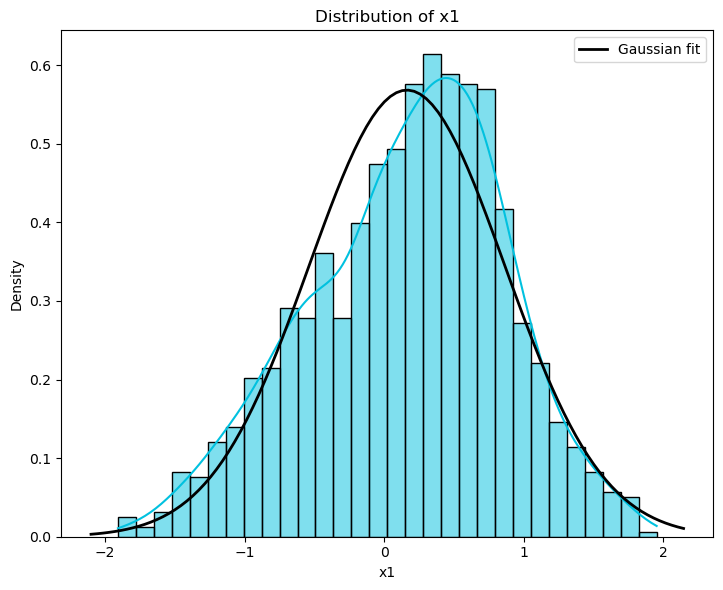

In [539]:
# Create distribution plots for x1 and x2
plt.figure(figsize=(14, 6))

# Distribution plot for x1
plt.subplot(1, 2, 1)
sns.histplot(X_train['x1'], kde=True, bins=30, color=colors[0], stat='density')
plt.title('Distribution of x1')

# Fit a normal distribution to x1
mu_x1, std_x1 = norm.fit(X_train['x1'])
xmin_x1, xmax_x1 = plt.xlim()
x_x1 = np.linspace(xmin_x1, xmax_x1, 100)
p_x1 = norm.pdf(x_x1, mu_x1, std_x1)
plt.plot(x_x1, p_x1, 'k', linewidth=2, label='Gaussian fit')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [584]:
# New_df is from the random undersample data (fewer instances)

X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_train.values)

X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X_train.values)

X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X_train.values)

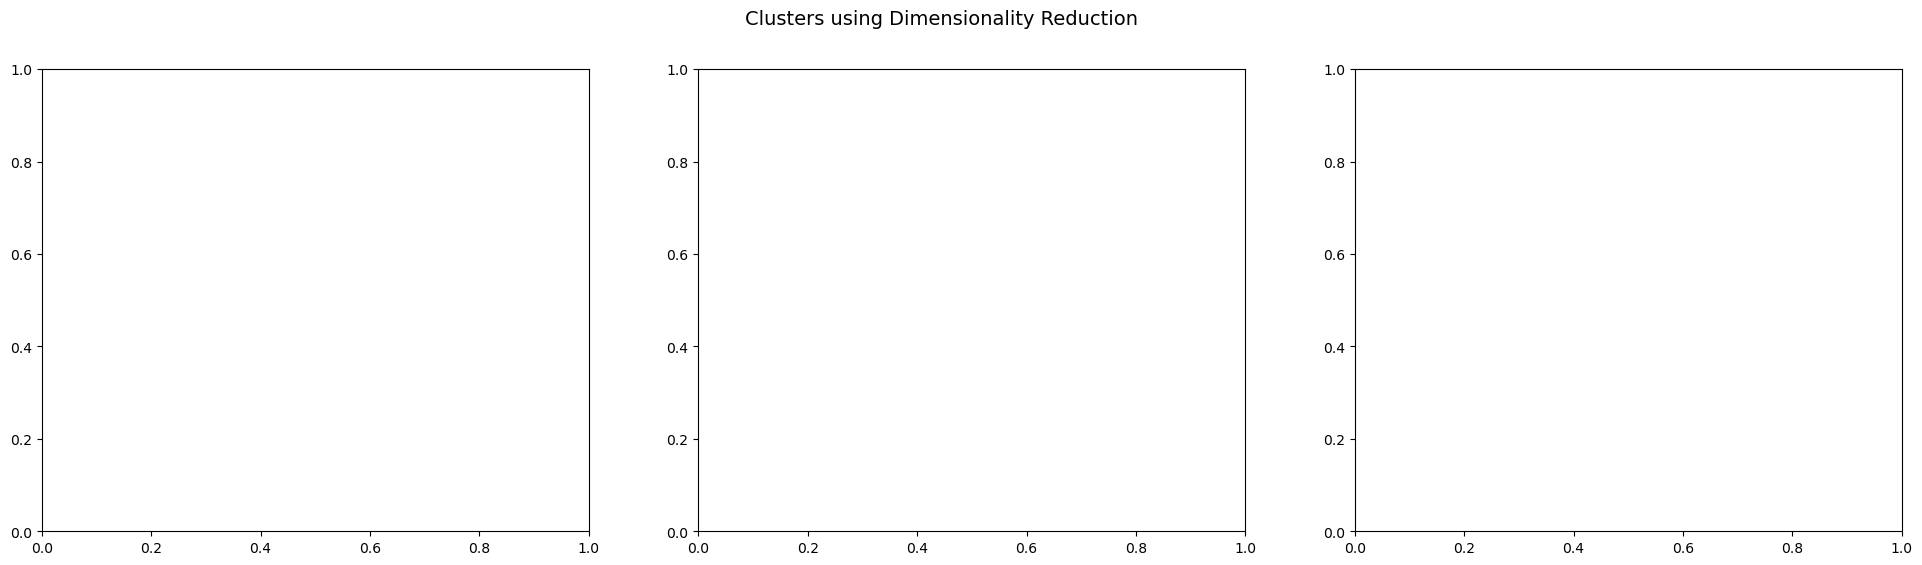

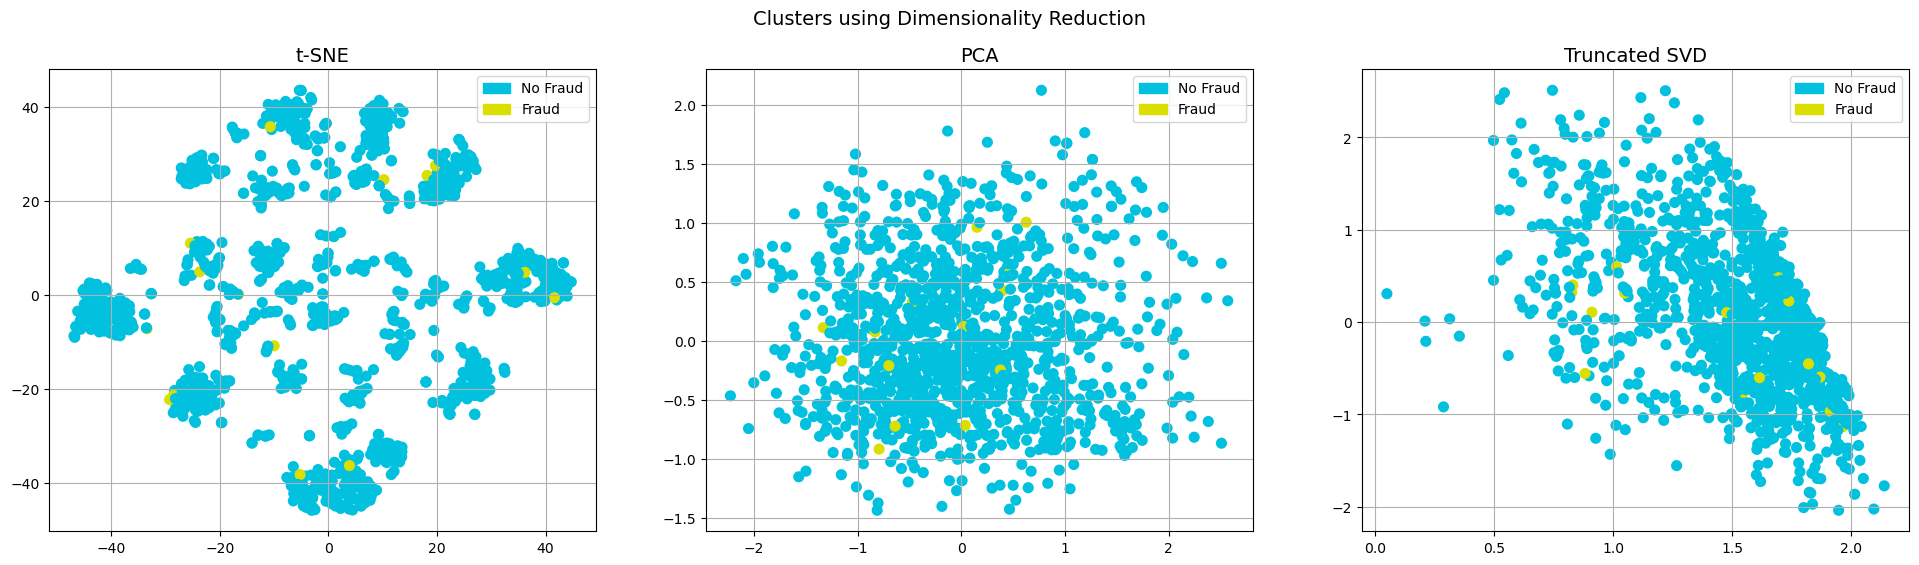

In [585]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

# Define the colors
colors = ["#01c1df", "#dbdf01"]  # Cyan and Yellow

# Create subplots
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

# Define patches for the legend
cyan_patch = mpatches.Patch(color=colors[0], label='No Fraud')
yellow_patch = mpatches.Patch(color=colors[1], label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=[colors[i] for i in y_train], linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[cyan_patch, yellow_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], c=[colors[i] for i in y_train], linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[cyan_patch, yellow_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:, 0], X_reduced_svd[:, 1], c=[colors[i] for i in y_train], linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[cyan_patch, yellow_patch])

# Show the plots
plt.show()

No relevant information

## Models

### Random Forest

#### Cross validaion

In [661]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
#We are going to ensure that we have the same splits of the data every time. 
#We can ensure this by creating a KFold object, kf, and passing cv=kf instead of the more common cv=5.

kf = StratifiedKFold(n_splits=5, shuffle=False)

#### Training model

In [662]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline, make_pipeline

SMOTETomek_pipeline = make_pipeline(SMOTETomek(sampling_strategy = 0.1,tomek=TomekLinks(sampling_strategy='not majority',n_jobs = 4)), 
                              RandomForestClassifier(n_estimators=50, max_depth=6, random_state=42))

In [663]:
score = cross_val_score(SMOTETomek_pipeline, X_train, y_train, scoring='f1', cv=kf)
print("Cross Validation Recall Scores are: {}".format(score))
print("Average Cross Validation Recall score: {}".format(score.mean()))

Cross Validation Recall Scores are: [0. 0. 0. 0. 0.]
Average Cross Validation Recall score: 0.0


In [664]:
SMOTETomek_rf = SMOTETomek_pipeline
SMOTETomek_rf.fit(X_train, y_train)

Pipeline(steps=[('smotetomek',
                 SMOTETomek(sampling_strategy=0.1,
                            tomek=TomekLinks(n_jobs=4,
                                             sampling_strategy='not '
                                                               'majority'))),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=6, n_estimators=50,
                                        random_state=42))])

In [665]:

### This part of the code wasn't executed
from sklearn.model_selection import GridSearchCV

params = {
   'n_estimators': [50,100, 150, 200],
   'max_depth': [4, 6, 10,12],
   'class_weight': ['balanced'],
   'random_state': [42,1,21,31]
}


In [666]:

new_params = {'randomforestclassifier__' + key: params[key] for key in params}
SMOTETomek_rf = GridSearchCV(SMOTETomek_pipeline, param_grid=new_params, cv=kf, scoring='f1',
                        return_train_score=True)
SMOTETomek_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('smotetomek',
                                        SMOTETomek(sampling_strategy=0.1,
                                                   tomek=TomekLinks(n_jobs=4,
                                                                    sampling_strategy='not '
                                                                                      'majority'))),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(max_depth=6,
                                                               n_estimators=50,
                                                               random_state=42))]),
             param_grid={'randomforestclassifier__class_weight': ['balanced'],
                         'randomforestclassifier__max_depth': [4, 6, 10, 12],
                         'randomforestclassifier__n_estimators': [50, 100, 150,
                                                                  200],
                         'randomforestclassifier__random_state': [42, 1, 21,
                                                                  31]},
             return_train_score=True, scoring='f1')

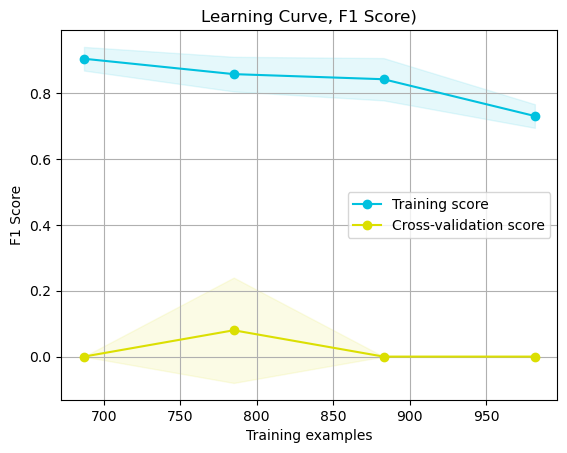

In [667]:
# Generate learning curve data using F1 score
train_sizes, train_scores, test_scores = learning_curve(
    SMOTETomek_pipeline, X_train, y_train, cv=kf, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='f1'
)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve, F1 Score)")
plt.xlabel("Training examples")
plt.ylabel("F1 Score")
plt.grid()

# Plot the fill between for training scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color=colors[0])
plt.plot(train_sizes, train_scores_mean, 'o-', color=colors[0], label="Training score")

# Plot the fill between for test scores
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color=colors[1])
plt.plot(train_sizes, test_scores_mean, 'o-', color=colors[1], label="Cross-validation score")

plt.legend(loc="best")
plt.show()

####     Confusion matrix and scores

In [668]:
y_pred = SMOTETomek_rf.predict(X_test)
y_train_pred = SMOTETomek_rf.predict(X_train)


In [669]:

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

cm = confusion_matrix(y_test, y_pred)

SMOTETomek_rf_Recall = recall_score(y_test, y_pred)
SMOTETomek_rf_Precision = precision_score(y_test, y_pred)
SMOTETomek_rf_f1 = f1_score(y_test, y_pred)
SMOTETomek_rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[585   8]
 [  4   3]]


In [670]:
ndf = [(SMOTETomek_rf_Recall, SMOTETomek_rf_Precision, SMOTETomek_rf_f1, SMOTETomek_rf_accuracy)]

SMOTETomek_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
SMOTETomek_rf_score.insert(0, 'Random Forest with', 'SMOTE + Tomek')
SMOTETomek_rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,SMOTE + Tomek,0.428571,0.272727,0.333333,0.98


#### AUC-ROC Curve

In [671]:
# Assuming y_train and y_train_pred are defined
train_ROCAUCscore = roc_auc_score(y_train, y_train_pred)
print(f"AUC-ROC Curve for Training Set: {train_ROCAUCscore:.4f}")

# Existing code for test set
test_ROCAUCscore = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC Curve for SMOTE-Tomek: {test_ROCAUCscore:.4f}")

AUC-ROC Curve for Training Set: 0.7971
AUC-ROC Curve for SMOTE-Tomek: 0.7075


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


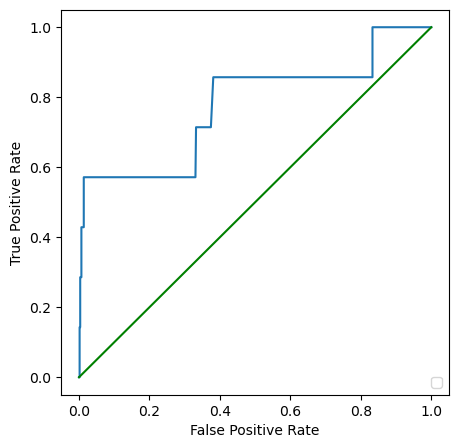

In [672]:
y_proba = SMOTETomek_rf.predict_proba(X_test)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_auc_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
# Plots the ROC curve using the sklearn methods - Good plot
plot_auc_roc_curve(y_test, y_proba[:, 1])



### Logistic regression

In [543]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
#We are going to ensure that we have the same splits of the data every time. 
#We can ensure this by creating a KFold object, kf, and passing cv=kf instead of the more common cv=5.

kf = StratifiedKFold(n_splits=5, shuffle=False)

In [647]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

# Define the pipeline with SMOTETomek and LogisticRegression
SMOTETomek_pipeline = make_pipeline(
    SMOTETomek(sampling_strategy=0.1, tomek=TomekLinks(sampling_strategy='all', n_jobs=4)),
    LogisticRegression(max_iter=1000, random_state=42)
)

# Perform cross-validation
score = cross_val_score(SMOTETomek_pipeline, X_train, y_train, scoring='f1', cv=kf)
print("Cross Validation F1 Scores are: {}".format(score))
print("Average Cross Validation F1 score: {}".format(score.mean()))

# Fit the pipeline
SMOTETomek_lr = SMOTETomek_pipeline
SMOTETomek_lr.fit(X_train, y_train)

# Define hyperparameters for GridSearchCV
params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': [None, 'l2'],
    'class_weight': ['balanced']
}

new_params = {'logisticregression__' + key: params[key] for key in params}
SMOTETomek_lr = GridSearchCV(SMOTETomek_pipeline, param_grid=new_params, cv=kf, scoring='f1', return_train_score=True)
SMOTETomek_lr.fit(X_train, y_train)

# Predict on the test set
y_pred = SMOTETomek_lr.predict(X_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
SMOTETomek_lr_Recall = recall_score(y_test, y_pred)
SMOTETomek_lr_Precision = precision_score(y_test, y_pred)
SMOTETomek_lr_f1 = f1_score(y_test, y_pred)
SMOTETomek_lr_accuracy = accuracy_score(y_test, y_pred)

print(cm)

Cross Validation F1 Scores are: [0.33333333 0.         0.44444444 0.25       0.        ]
Average Cross Validation F1 score: 0.20555555555555555


c:\Users\aaihs\anaconda3\envs\CLAC\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\aaihs\anaconda3\envs\CLAC\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\aaihs\anaconda3\envs\CLAC\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\aaihs\anaconda3\envs\CLAC\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\aaihs\anaconda3\envs\CLAC\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\aaihs\anaconda3\envs\CLAC\lib\site-packages\sklearn\linear_mo

[[526  67]
 [  3   4]]


c:\Users\aaihs\anaconda3\envs\CLAC\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


In [648]:
# Assuming the evaluation metrics are already calculated
ndf = [(SMOTETomek_lr_Recall, SMOTETomek_lr_Precision, SMOTETomek_lr_f1, SMOTETomek_lr_accuracy)]

# Create a DataFrame with the evaluation metrics
SMOTETomek_lr_score = pd.DataFrame(data=ndf, columns=['Recall', 'Precision', 'F1 Score', 'Accuracy'])
SMOTETomek_lr_score.insert(0, 'Logistic Regression with', 'SMOTE + Tomek')

# Display the DataFrame
SMOTETomek_lr_score

,Logistic Regression with,Recall,Precision,F1 Score,Accuracy
0,SMOTE + Tomek,0.571429,0.056338,0.102564,0.883333


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC-ROC Curve for SMOTE-Tomek: 0.7149


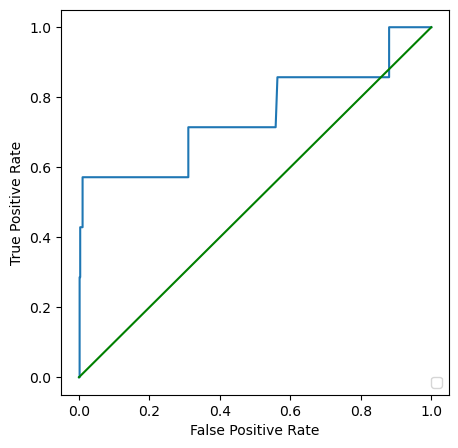

In [553]:
from sklearn.metrics import roc_auc_score
ROCAUCscore = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC Curve for SMOTE-Tomek: {ROCAUCscore:.4f}")

y_proba = SMOTETomek_rf.predict_proba(X_test)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_auc_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
# Plots the ROC curve using the sklearn methods - Good plot
plot_auc_roc_curve(y_test, y_proba[:, 1])
# Plots the ROC curve using the sklearn methods - Bad plot
#plot_sklearn_roc_curve(y_test, y_pred)y_proba = SMOTETomek_rf.predict_proba(X_test)

#### Learning curve Logistic regression

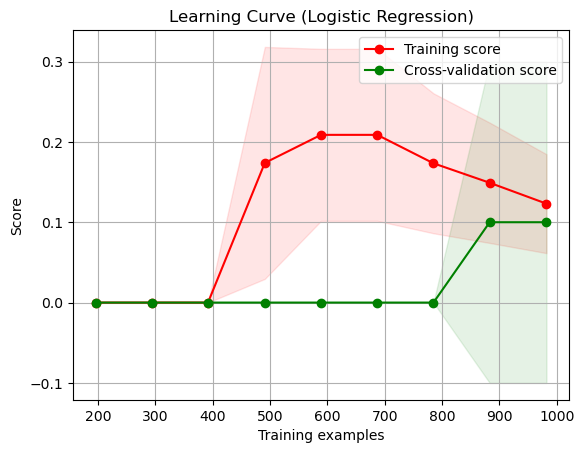

In [651]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve, StratifiedKFold
from sklearn.datasets import make_classification


# Define the model
model = LogisticRegression(random_state=1)

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=21)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='f1'
)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve (Logistic Regression)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

# Plot the fill between for training scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

# Plot the fill between for test scores
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

### Desicion Tree Classifier

In [652]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
import pandas as pd

# Define the pipeline with SMOTETomek and DecisionTreeClassifier
SMOTETomek_pipeline = make_pipeline(
    SMOTETomek(sampling_strategy=0.1, tomek=TomekLinks(sampling_strategy='not majority', n_jobs=4)),
    DecisionTreeClassifier(random_state=42)
)

# Perform cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(SMOTETomek_pipeline, X_train, y_train, scoring='f1', cv=kf)
print("Cross Validation F1 Scores are: {}".format(score))
print("Average Cross Validation F1 score: {}".format(score.mean()))

# Fit the pipeline
SMOTETomek_dt = SMOTETomek_pipeline
SMOTETomek_dt.fit(X_train, y_train)

# Define hyperparameters for GridSearchCV
params = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

new_params = {'decisiontreeclassifier__' + key: params[key] for key in params}
SMOTETomek_dt = GridSearchCV(SMOTETomek_pipeline, param_grid=new_params, cv=kf, scoring='f1', return_train_score=True)
SMOTETomek_dt.fit(X_train, y_train)

# Predict on the test set
y_pred = SMOTETomek_dt.predict(X_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
SMOTETomek_dt_Recall = recall_score(y_test, y_pred)
SMOTETomek_dt_Precision = precision_score(y_test, y_pred)
SMOTETomek_dt_f1 = f1_score(y_test, y_pred)
SMOTETomek_dt_accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Recall: ", SMOTETomek_dt_Recall)
print("Precision: ", SMOTETomek_dt_Precision)
print("F1 Score: ", SMOTETomek_dt_f1)
print("Accuracy: ", SMOTETomek_dt_accuracy)

# Create a DataFrame with the evaluation metrics
ndf = [(SMOTETomek_dt_Recall, SMOTETomek_dt_Precision, SMOTETomek_dt_f1, SMOTETomek_dt_accuracy)]
SMOTETomek_dt_score = pd.DataFrame(data=ndf, columns=['Recall', 'Precision', 'F1 Score', 'Accuracy'])
SMOTETomek_dt_score.insert(0, 'Decision Tree with', 'SMOTE + Tomek')

SMOTETomek_dt_score


Cross Validation F1 Scores are: [0.33333333 0.         0.5        0.         0.        ]
Average Cross Validation F1 score: 0.16666666666666666
Confusion Matrix:
 [[560  33]
 [  3   4]]
Recall:  0.5714285714285714
Precision:  0.10810810810810811
F1 Score:  0.18181818181818182
Accuracy:  0.94


,Decision Tree with,Recall,Precision,F1 Score,Accuracy
0,SMOTE + Tomek,0.571429,0.108108,0.181818,0.94


### XGB Classifier

In [623]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline, make_pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
import pandas as pd

# Define the pipeline with SMOTETomek and XGBClassifier
SMOTETomek_pipeline = make_pipeline(
    SMOTETomek(sampling_strategy=0.1, tomek=TomekLinks(sampling_strategy='not majority', n_jobs=4)),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
)

# Perform cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(SMOTETomek_pipeline, X_train, y_train, scoring='f1', cv=kf)
print("Cross Validation F1 Scores are: {}".format(score))
print("Average Cross Validation F1 score: {}".format(score.mean()))

# Fit the pipeline
SMOTETomek_xgb = SMOTETomek_pipeline
SMOTETomek_xgb.fit(X_train, y_train)

# Define hyperparameters for GridSearchCV
params = {
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'scale_pos_weight': [1, 2, 5]
}

new_params = {'xgbclassifier__' + key: params[key] for key in params}
SMOTETomek_xgb = GridSearchCV(SMOTETomek_pipeline, param_grid=new_params, cv=kf, scoring='f1', return_train_score=True)
SMOTETomek_xgb.fit(X_train, y_train)

# Predict on the test set
y_pred = SMOTETomek_xgb.predict(X_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
SMOTETomek_xgb_Recall = recall_score(y_test, y_pred)
SMOTETomek_xgb_Precision = precision_score(y_test, y_pred)
SMOTETomek_xgb_f1 = f1_score(y_test, y_pred)
SMOTETomek_xgb_accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Recall: ", SMOTETomek_xgb_Recall)
print("Precision: ", SMOTETomek_xgb_Precision)
print("F1 Score: ", SMOTETomek_xgb_f1)
print("Accuracy: ", SMOTETomek_xgb_accuracy)

# Create a DataFrame with the evaluation metrics
ndf = [(SMOTETomek_xgb_Recall, SMOTETomek_xgb_Precision, SMOTETomek_xgb_f1, SMOTETomek_xgb_accuracy)]
SMOTETomek_xgb_score = pd.DataFrame(data=ndf, columns=['Recall', 'Precision', 'F1 Score', 'Accuracy'])
SMOTETomek_xgb_score.insert(0, 'XGBoost with', 'SMOTE + Tomek')
print(SMOTETomek_xgb_score)

c:\Users\aaihs\anaconda3\envs\CLAC\lib\site-packages\xgboost\core.py:158: UserWarning: [22:39:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\aaihs\anaconda3\envs\CLAC\lib\site-packages\xgboost\core.py:158: UserWarning: [22:39:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\aaihs\anaconda3\envs\CLAC\lib\site-packages\xgboost\core.py:158: UserWarning: [22:39:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\aaih

Cross Validation F1 Scores are: [0.5 0.  0.  0.  0. ]
Average Cross Validation F1 score: 0.1


c:\Users\aaihs\anaconda3\envs\CLAC\lib\site-packages\xgboost\core.py:158: UserWarning: [22:39:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\aaihs\anaconda3\envs\CLAC\lib\site-packages\xgboost\core.py:158: UserWarning: [22:39:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\aaihs\anaconda3\envs\CLAC\lib\site-packages\xgboost\core.py:158: UserWarning: [22:39:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\aaih

Confusion Matrix:
 [[575  18]
 [  4   3]]
Recall:  0.42857142857142855
Precision:  0.14285714285714285
F1 Score:  0.21428571428571427
Accuracy:  0.9633333333333334
    XGBoost with    Recall  Precision  F1 Score  Accuracy
0  SMOTE + Tomek  0.428571   0.142857  0.214286  0.963333


## Conclusion